In [1]:
import pandas as pd
import json

In [2]:
import os
if 'R_HOME' not in os.environ:
  os.environ['R_HOME'] = '/usr/lib/R'

In [3]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: Setting LC_CTYPE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 3: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 4: Setting LC_MESSAGES failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinte

In [4]:
def convert_list_of_dicts_into_dataframe(dict_list):
  output = {}
  for keyname in dict_list[0].keys():
    output[keyname] = []
  for item in dict_list:
    for k,v in item.items():
      output[k].append(v)
  return pd.DataFrame.from_dict(output)

#print(convert_list_of_dicts_into_dataframe([
#  {'a': 3, 'b': 5},
#  {'a': 4, 'b': 6}
#]))

In [5]:
sessions_for_user_by_day_and_goal_for_all_users = json.load(open('browser_all_session_info_sept18_v2.json'))

In [6]:
def compute_intensity(domains_and_sessions):
  #print(domains_and_sessions)
  number_of_sessions_total = 0
  number_of_sessions_where_intervention_was_seen = 0
  for domain_and_sessions in domains_and_sessions:
    domain = domain_and_sessions['domain']
    is_goal_enabled = domain_and_sessions['is_goal_enabled']
    is_goal_frequent = domain_and_sessions['is_goal_frequent']
    if not is_goal_enabled:
      continue
    for session_info in domain_and_sessions['session_info_list_for_domain']:
      number_of_sessions_total += 1
      if session_info['intervention_active'] != None:
        number_of_sessions_where_intervention_was_seen += 1
  if number_of_sessions_total == 0:
    return None
  return number_of_sessions_where_intervention_was_seen / number_of_sessions_total

def compute_intensity_other_goal_domains(domains_and_sessions, target_domain):
  number_of_sessions_total = 0
  number_of_sessions_where_intervention_was_seen = 0
  for domain_and_sessions in domains_and_sessions:
    domain = domain_and_sessions['domain']
    if domain == target_domain:
      continue
    is_goal_enabled = domain_and_sessions['is_goal_enabled']
    is_goal_frequent = domain_and_sessions['is_goal_frequent']
    if not is_goal_enabled:
      continue
    for session_info in domain_and_sessions['session_info_list_for_domain']:
      number_of_sessions_total += 1
      if session_info['intervention_active'] != None:
        number_of_sessions_where_intervention_was_seen += 1
  if number_of_sessions_total == 0:
    return None
  return number_of_sessions_where_intervention_was_seen / number_of_sessions_total

def test_compute_intensity():
  for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
    user = sessions_for_user_by_day_and_goal['user']
    for day_domains_and_sessions in sessions_for_user_by_day_and_goal['days_domains_and_sessions']:
      #if day_domains_and_sessions['is_goal_enabled'] != True:
      #  continue
      if True not in ([x['is_goal_enabled'] for x in day_domains_and_sessions['domains_and_sessions']]):
        continue
      print(compute_intensity(day_domains_and_sessions['domains_and_sessions']))
      return
#test_compute_intensity()

In [51]:
# def compute_have_preview_sessions_today(domain_and_sessions):
#   print(domain_and_sessions)

# def test_compute_have_preview_sessions_today():
#   for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
#     user = sessions_for_user_by_day_and_goal['user']
#     for day_domains_and_sessions in sessions_for_user_by_day_and_goal['days_domains_and_sessions']:
#       #if day_domains_and_sessions['is_goal_enabled'] != True:
#       #  continue
#       if True not in ([x['is_goal_enabled'] for x in day_domains_and_sessions['domains_and_sessions']]):
#         continue
#       for domain_and_sessions in day_domains_and_sessions['domains_and_sessions']:
#         print(compute_have_preview_sessions_today(domain_and_sessions))
#         return

# test_compute_have_preview_sessions_today()

In [7]:


def print_data_for_users():
  for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
    user = sessions_for_user_by_day_and_goal['user']
    if user == '6216c587462fb5fa9ca9f0e9':
      print(sessions_for_user_by_day_and_goal)
#print_data_for_users()

In [109]:
def passes_filters(filter_funcs, item):
  for filter_func in filter_funcs:
    if not filter_func(item):
      return False
  return True

def make_dictlist_days(sessions_for_user_by_day_and_goal_for_all_users, item_filter_funcs=[], day_filter_funcs=[], user_filter_funcs=[]):
  output = []
  for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
    user = sessions_for_user_by_day_and_goal['user']
    if not passes_filters(user_filter_funcs, sessions_for_user_by_day_and_goal):
      continue
    #epoch_list = [x['epoch'] for x in sessions_for_user_by_day_and_goal['days_domains_and_sessions']]
    #first_epoch_for_user = min(epoch_list)
    #last_epoch_for_user = max(epoch_list)
    for day_domains_and_sessions in sessions_for_user_by_day_and_goal['days_domains_and_sessions']:
      epoch = day_domains_and_sessions['epoch']
      #day_domains_and_sessions['days_since_install'] = epoch - first_epoch_for_user
      #day_domains_and_sessions['days_until_last'] = last_epoch_for_user - epoch
      if not passes_filters(day_filter_funcs, day_domains_and_sessions):
        continue
      intensity = compute_intensity(day_domains_and_sessions['domains_and_sessions'])
      for domain_and_sessions in day_domains_and_sessions['domains_and_sessions']:
        domain = domain_and_sessions['domain']
        #have_preview_sessions = compute_have_preview_sessions_today(domain_and_sessions)
        intensity_other_goals = compute_intensity_other_goal_domains(day_domains_and_sessions['domains_and_sessions'], domain)
        time_on_domain_today = domain_and_sessions['time_on_domain_today']
        time_on_all_other_domains_today = domain_and_sessions['time_on_all_other_domains_today']
        time_on_other_goal_domains_today = domain_and_sessions['time_on_other_goal_domains_today']
        is_goal_enabled = domain_and_sessions['is_goal_enabled']
        is_goal_frequent = domain_and_sessions['is_goal_frequent']
        newitem = {
          'user': user,
          'epoch': epoch,
          'domain': domain,
          #'have_preview_sessions': have_preview_sessions,
          'time_on_domain_today': time_on_domain_today,
          'time_on_all_other_domains_today': time_on_all_other_domains_today,
          'time_on_other_goal_domains_today': time_on_other_goal_domains_today,
          'is_goal_enabled': is_goal_enabled,
          'is_goal_frequent': is_goal_frequent,
          'intensity': intensity,
          'intensity_other_goals': intensity_other_goals
        }
        if not passes_filters(item_filter_funcs, newitem):
          continue
        output.append(newitem)
  return output

def make_dataframe_days(sessions_for_user_by_day_and_goal_for_all_users, item_filter_funcs=[], day_filter_funcs=[], user_filter_funcs=[]):
  #sessions_for_user_by_day_and_goal_for_all_users = get_sessions_for_user_by_day_and_goal_for_all_users()
  output = make_dictlist_days(sessions_for_user_by_day_and_goal_for_all_users, item_filter_funcs, day_filter_funcs, user_filter_funcs)
  return convert_list_of_dicts_into_dataframe(output)

# item filter funcs
def enabled_goals_only(x):
  return x['is_goal_enabled'] == True

# day filter funcs
def not_first_day(x):
  return x['days_since_install'] != 0

def not_last_day(x):
  return x['days_until_last'] != 0

# user filter funcs
def at_least_two_days(x):
  return len(x['days_domains_and_sessions']) > 1

def at_least_two_weeks(x):
  #print(len(x))
  return len(x['days_domains_and_sessions']) > 13

def exclude_blacklist(x):
  blacklist = [
    # users who changed their clock while using habitlab
    '6216c587462fb5fa9ca9f0e9',
    'b3f8a7df8e4aec23e62f7cc7',
    'a80b94f6cad4a1280dfe935a',
    '42932100873bd6c4750026a8'
  ]
  return x['user'] not in blacklist

def exclude_unofficial(x):
  return x['is_user_unofficial'] == False

#df = make_dataframe_days(sessions_for_user_by_day_and_goal_for_all_users, [enabled_goals_only], [], [])
df = make_dataframe_days(sessions_for_user_by_day_and_goal_for_all_users, [enabled_goals_only], [not_first_day, not_last_day], [exclude_unofficial, exclude_blacklist])
#print(make_dataframe_days())

%Rpush df

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


                       user           epoch                    domain    
 c765fb71d498eb3846f03cd9:  157   Min.   :947.0   www.facebook.com:8608  
 370c2e73147e37d2db03e788:  126   1st Qu.:963.0   www.youtube.com :7334  
 17e7de4f422a37ce6b911178:  117   Median :971.0   twitter.com     :2408  
 37615573eea8075a109f0bef:  113   Mean   :970.2   www.reddit.com  :1609  
 1a15ab8c5d0ef03d6e813dc1:  110   3rd Qu.:978.0   mail.google.com :1560  
 270232473297dec6637b3c6b:  104   Max.   :986.0   www.amazon.com  : 893  
 (Other)                 :22291                   (Other)         : 606  
 time_on_domain_today time_on_all_other_domains_today
 Min.   :       6     Min.   :        0              
 1st Qu.:     296     1st Qu.:    12119              
 Median :    1641     Median :    35090              
 Mean   :   32785     Mean   :   231445              
 3rd Qu.:    8372     3rd Qu.:    97192              
 Max.   :24483262     Max.   :929639322              
                              

In [111]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | domain)
   Data: ndata

REML criterion at convergence: 104764.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0784 -0.6715  0.0436  0.6899  4.2241 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 1.407    1.186   
 Residual             5.536    2.353   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.758e+00  3.786e-01  7.684e+00  17.850 1.56e-07 ***
is_goal_frequentTRUE -6.773e-02  3.105e-02  2.301e+04  -2.181   0.0292 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.040


In [11]:
df.dtypes

user                                 object
epoch                                 int64
domain                               object
time_on_domain_today                  int64
time_on_other_goal_domains_today      int64
is_goal_enabled                        bool
is_goal_frequent                       bool
intensity                           float64
intensity_other_goals               float64
dtype: object

In [12]:
#ndata = df
#ndata = ndata[ndata['is_goal_enabled'] == True]
#ndata = ndata[ndata['is_goal_frequent'] != 'inconsistent']
#ndata.shape

In [13]:
df

,user,epoch,domain,time_on_domain_today,time_on_other_goal_domains_today,is_goal_enabled,is_goal_frequent,intensity,intensity_other_goals
0,c11e5f2d93f249b5083989b2,947,www.youtube.com,26,859,True,False,0.888889,1.0
1,c11e5f2d93f249b5083989b2,947,www.reddit.com,859,26,True,False,0.888889,0.0
2,c11e5f2d93f249b5083989b2,953,www.reddit.com,829,24669,True,True,0.227273,0.0
3,c11e5f2d93f249b5083989b2,953,www.youtube.com,24669,829,True,True,0.227273,1.0
4,c11e5f2d93f249b5083989b2,954,www.reddit.com,1394,0,True,True,1.000000,NaN
5,c11e5f2d93f249b5083989b2,955,www.youtube.com,949,1351,True,False,0.500000,1.0
6,c11e5f2d93f249b5083989b2,955,www.reddit.com,1351,949,True,False,0.500000,0.0
7,c11e5f2d93f249b5083989b2,956,www.youtube.com,2163,1540,True,False,0.500000,1.0
8,c11e5f2d93f249b5083989b2,956,www.reddit.com,1540,2163,True,False,0.500000,0.0
9,c11e5f2d93f249b5083989b2,957,www.youtube.com,15557,501,True,False,0.230769,1.0


In [172]:
df[df['time_on_other_goal_domains_today'] > 86400]['user'].unique().shape

(263,)

In [173]:
df['user'].unique().shape

(1034,)

In [14]:
#%Rpush df

#filename = 'browser_time_on_domains_sept18.csv'
#df = pd.read_csv(filename)

In [15]:
%%R -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
#library(ez)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: 'lmerTest'


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from 'package:lme4':

    lmer


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from 'package:stats':

    step


  warnings.warn(x, RRuntimeWarning)


In [16]:
%%R -w 5 -h 5 --units in -r 200

ndata = df
ndata = subset(ndata, time_on_domain_today > 8*1000*3600)
#summary(ndata)
show(ndata)


[1] user                             epoch                           
[3] domain                           time_on_domain_today            
[5] time_on_other_goal_domains_today is_goal_enabled                 
[7] is_goal_frequent                 intensity                       
[9] intensity_other_goals           
<0 rows> (or 0-length row.names)


In [167]:
%%R -w 5 -h 5 --units in -r 200

ndata = df
ndata$domain = as.factor(ndata$domain)
ndata$user = as.factor(ndata$user)
ndata$is_goal_enabled = as.factor(ndata$is_goal_enabled)
ndata$is_goal_frequent = as.factor(ndata$is_goal_frequent)
ndata$log_time_on_domain_today = log(ndata$time_on_domain_today)
ndata$log_time_on_other_goal_domains_today = log(ndata$time_on_other_goal_domains_today)
ndata$log_time_on_all_other_domains_today = log(ndata$time_on_all_other_domains_today)
#ndata = subset(ndata, domain == 'www.facebook.com' | domain == 'www.youtube.com')
#ndata = subset(ndata, domain == 'www.facebook.com')
ndata$log_time_on_other_goal_domains_today[which(!is.finite(ndata$log_time_on_other_goal_domains_today))] <- 0
ndata$log_time_on_all_other_domains_today[which(!is.finite(ndata$log_time_on_all_other_domains_today))] <- 0


#ndata = subset(ndata, time_on_domain_today > 5) # exclude preview sessions
#ndata = subset(ndata, time_on_domain_today < 8*3600) # exclude preview sessions
#ndata = subset(ndata, time_on_all_other_domains_today < 8*3600) # exclude preview sessions


ndata_all = ndata
ndata_noyoutube = subset(ndata, domain != 'www.youtube.com')
ndata_youtube = subset(ndata, domain == 'www.youtube.com')
ndata_facebook = subset(ndata, domain == 'www.facebook.com')

#ndata = subset(ndata, time_on_other_goal_domains_today != 0)
summary(ndata)

                       user           epoch                    domain    
 c765fb71d498eb3846f03cd9:  163   Min.   :947.0   www.facebook.com:8748  
 370c2e73147e37d2db03e788:  126   1st Qu.:963.0   www.youtube.com :7455  
 17e7de4f422a37ce6b911178:  118   Median :971.0   twitter.com     :2462  
 37615573eea8075a109f0bef:  116   Mean   :970.2   www.reddit.com  :1637  
 1a15ab8c5d0ef03d6e813dc1:  111   3rd Qu.:978.0   mail.google.com :1585  
 8003c4d51219e6c8d11e4502:  108   Max.   :986.0   www.amazon.com  : 941  
 (Other)                 :22715                   (Other)         : 629  
 time_on_domain_today time_on_all_other_domains_today
 Min.   :       1     Min.   :        0              
 1st Qu.:     265     1st Qu.:    12056              
 Median :    1543     Median :    35036              
 Mean   :   32171     Mean   :   229973              
 3rd Qu.:    8057     3rd Qu.:    97019              
 Max.   :24483262     Max.   :929639322              
                              

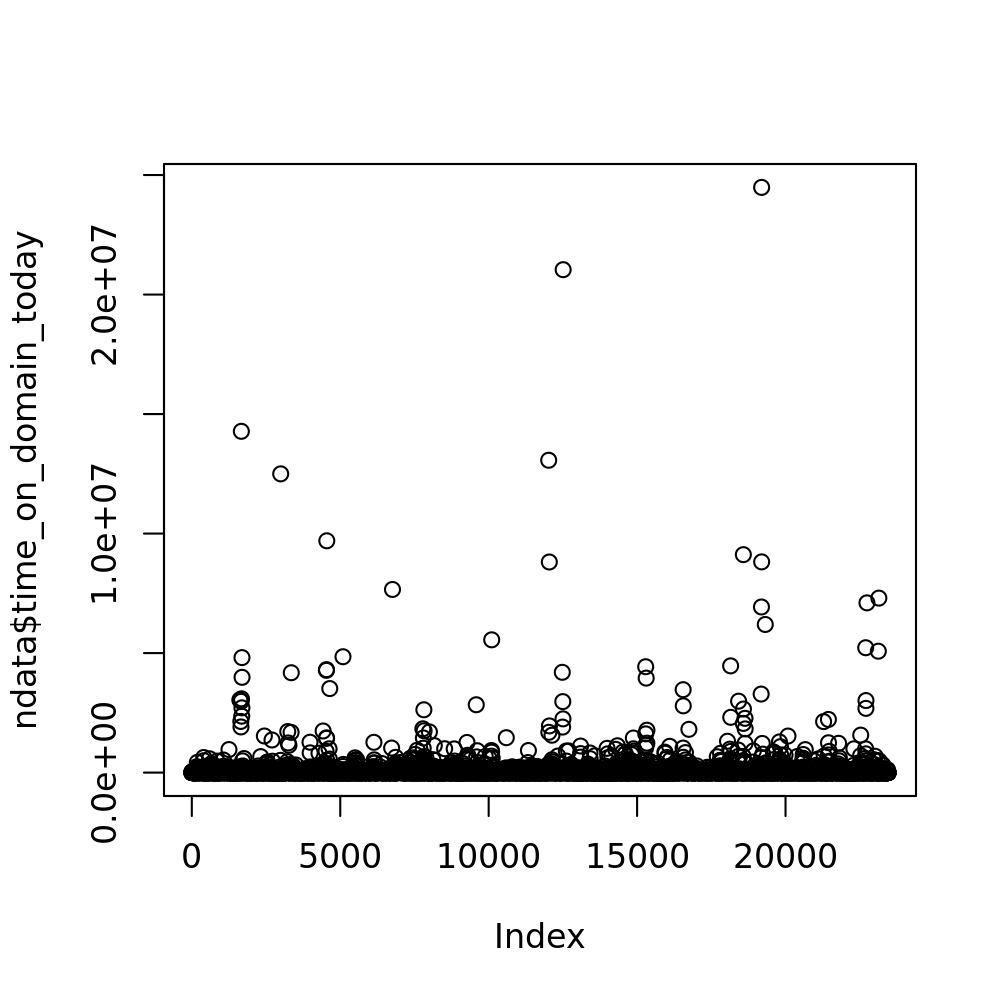

In [163]:
#%%R -w 5 -h 5 --units in -r 200
#plot(ndata$time_on_domain_today)

In [165]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | domain)
   Data: ndata

REML criterion at convergence: 41093.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2506 -0.6271  0.1070  0.7481  2.2634 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 0.5142   0.7171  
 Residual             4.4377   2.1066  
Number of obs: 9486, groups:  domain, 11

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          6.117e+00  2.472e-01 7.347e+00  24.746  2.4e-08 ***
is_goal_frequentTRUE 1.042e-02  4.330e-02 9.478e+03   0.241     0.81    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.085


In [115]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals +  
    (1 | domain)
   Data: ndata

REML criterion at convergence: 79424.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9930 -0.6675  0.0482  0.6874  4.3670 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 1.437    1.199   
 Residual             5.373    2.318   
Number of obs: 17562, groups:  domain, 11

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            6.941e+00  3.885e-01  6.346e+00   17.87 1.15e-06 ***
is_goal_frequentTRUE  -7.846e-02  3.503e-02  1.755e+04   -2.24   0.0251 *  
intensity_other_goals -3.991e-01  3.990e-02  1.755e+04  -10.00  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) i__TRU
is_gl_fTRUE -0.042       
intnsty_th

In [150]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_all_other_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_all_other_domains_today ~ is_goal_frequent + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 94639

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6691 -0.4964  0.0646  0.5988  5.4758 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 0.04327  0.208   
 Residual             3.56902  1.889   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           1.046e+01  7.647e-02  6.948e+00 136.819 3.53e-13 ***
is_goal_frequentTRUE -3.781e-02  2.493e-02  2.301e+04  -1.517    0.129    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.155


In [151]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 128622.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0969 -0.9961  0.2471  0.7584  2.9136 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept)  1.083   1.041   
 Residual             15.615   3.952   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           7.172e+00  3.497e-01  8.591e+00  20.508 1.35e-08 ***
is_goal_frequentTRUE -2.831e-02  5.215e-02  2.301e+04  -0.543    0.587    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.071


In [118]:
#%%R -w 5 -h 5 --units in -r 200

#ndata = df
#subset(ndata, time_on_domain_today == 105384637)

In [119]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user)
   Data: ndata

REML criterion at convergence: 34104.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8005 -0.5465  0.0715  0.6196  5.5502 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.287    1.512   
 Residual             2.536    1.592   
Number of obs: 8608, groups:  user, 812

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             6.79080    0.06163  889.97504 110.190  < 2e-16 ***
is_goal_frequentTRUE   -0.13295    0.03900 8331.34155  -3.409 0.000655 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.302


In [120]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user) + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 101017.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9066 -0.5947  0.0691  0.6577  4.8684 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.437    1.199   
 domain   (Intercept) 1.422    1.193   
 Residual             4.342    2.084   
Number of obs: 23018, groups:  user, 1029; domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.617e+00  3.815e-01  8.234e+00  17.343    9e-08 ***
is_goal_frequentTRUE -5.506e-02  2.916e-02  2.279e+04  -1.888    0.059 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.038


In [121]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals +  
    (1 | user)
   Data: ndata

REML criterion at convergence: 23118.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5887 -0.5338  0.0684  0.5978  5.3589 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.330    1.527   
 Residual             2.452    1.566   
Number of obs: 5840, groups:  user, 692

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              7.02650    0.07868  930.95976  89.302  < 2e-16 ***
is_goal_frequentTRUE    -0.14618    0.04716 5616.52059  -3.100 0.001947 ** 
intensity_other_goals   -0.39292    0.11266 1981.51266  -3.488 0.000498 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) i__TRU
is_gl_fTRUE -0.285       
intnsty_th_ -0

In [122]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals +  
    (1 | user) + (1 | domain)
   Data: ndata

REML criterion at convergence: 76949.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7410 -0.6089  0.0711  0.6549  5.0239 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.265    1.125   
 domain   (Intercept) 1.651    1.285   
 Residual             4.329    2.081   
Number of obs: 17562, groups:  user, 786; domain, 11

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            6.944e+00  4.164e-01  6.380e+00  16.677 1.68e-06 ***
is_goal_frequentTRUE  -9.749e-02  3.310e-02  1.736e+04  -2.946  0.00323 ** 
intensity_other_goals -8.951e-01  4.646e-02  1.641e+04 -19.264  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects

In [123]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals +  
    (1 | user)
   Data: ndata

REML criterion at convergence: 24587.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8862 -0.5658  0.0690  0.6360  3.7686 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.860    1.691   
 Residual             4.244    2.060   
Number of obs: 5484, groups:  user, 700

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              7.79807    0.09605 1027.41815  81.185   <2e-16 ***
is_goal_frequentTRUE     0.03025    0.06405 5377.08984   0.472    0.637    
intensity_other_goals   -0.31042    0.13440 1609.74675  -2.310    0.021 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) i__TRU
is_gl_fTRUE -0.322       
intnsty_th_ -0

In [124]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
summary(ndata)


                       user           epoch                    domain    
 c765fb71d498eb3846f03cd9:  157   Min.   :947.0   www.facebook.com:8608  
 370c2e73147e37d2db03e788:  126   1st Qu.:963.0   www.youtube.com :7334  
 17e7de4f422a37ce6b911178:  117   Median :971.0   twitter.com     :2408  
 37615573eea8075a109f0bef:  113   Mean   :970.2   www.reddit.com  :1609  
 1a15ab8c5d0ef03d6e813dc1:  110   3rd Qu.:978.0   mail.google.com :1560  
 270232473297dec6637b3c6b:  104   Max.   :986.0   www.amazon.com  : 893  
 (Other)                 :22291                   (Other)         : 606  
 time_on_domain_today time_on_all_other_domains_today
 Min.   :       6     Min.   :        0              
 1st Qu.:     296     1st Qu.:    12119              
 Median :    1641     Median :    35090              
 Mean   :   32785     Mean   :   231445              
 3rd Qu.:    8372     3rd Qu.:    97192              
 Max.   :24483262     Max.   :929639322              
                              

In [125]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | domain) +  
    (1 | user)
   Data: ndata

REML criterion at convergence: 65366.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4349 -0.5834  0.0584  0.6351  5.3013 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.683    1.297   
 domain   (Intercept) 1.363    1.167   
 Residual             3.373    1.837   
Number of obs: 15684, groups:  user, 930; domain, 11

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.487e+00  3.930e-01  7.982e+00  16.508 1.88e-07 ***
is_goal_frequentTRUE -9.748e-02  3.172e-02  1.544e+04  -3.073  0.00212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.040


In [126]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | domain) +  
    (1 | user)
   Data: ndata

REML criterion at convergence: 65366.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4349 -0.5834  0.0584  0.6351  5.3013 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.683    1.297   
 domain   (Intercept) 1.363    1.167   
 Residual             3.373    1.837   
Number of obs: 15684, groups:  user, 930; domain, 11

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.487e+00  3.930e-01  7.982e+00  16.508 1.88e-07 ***
is_goal_frequentTRUE -9.748e-02  3.172e-02  1.544e+04  -3.073  0.00212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.040


In [127]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | domain)
   Data: ndata

REML criterion at convergence: 69159.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3027 -0.6665  0.0310  0.6725  4.5322 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 1.462    1.209   
 Residual             4.800    2.191   
Number of obs: 15684, groups:  domain, 11

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.582e+00  4.042e-01  6.909e+00  16.285 9.12e-07 ***
is_goal_frequentTRUE -8.640e-02  3.504e-02  1.567e+04  -2.465   0.0137 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.042


In [128]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals +  
    (1 | user) + (1 | domain)
   Data: ndata

REML criterion at convergence: 50652.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7918 -0.5904  0.0600  0.6279  5.3313 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.561    1.249   
 domain   (Intercept) 1.477    1.215   
 Residual             3.467    1.862   
Number of obs: 12078, groups:  user, 783; domain, 10

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            6.782e+00  4.165e-01  6.785e+00  16.285 1.09e-06 ***
is_goal_frequentTRUE  -1.068e-01  3.650e-02  1.189e+04  -2.925  0.00345 ** 
intensity_other_goals -6.100e-01  6.107e-02  8.747e+03  -9.989  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects

In [129]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user)
   Data: ndata

REML criterion at convergence: 34104.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8005 -0.5465  0.0715  0.6196  5.5502 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.287    1.512   
 Residual             2.536    1.592   
Number of obs: 8608, groups:  user, 812

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             6.79080    0.06163  889.97504 110.190  < 2e-16 ***
is_goal_frequentTRUE   -0.13295    0.03900 8331.34155  -3.409 0.000655 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.302


In [130]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user)
   Data: ndata

REML criterion at convergence: 33178.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0220 -0.5810  0.0801  0.6450  3.6795 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.839    1.685   
 Residual             4.492    2.119   
Number of obs: 7334, groups:  user, 830

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          7.627e+00  7.333e-02 1.016e+03 104.001   <2e-16 ***
is_goal_frequentTRUE 2.793e-02  5.711e-02 7.235e+03   0.489    0.625    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.381


In [131]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user) + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 65366.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4349 -0.5834  0.0584  0.6351  5.3013 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.683    1.297   
 domain   (Intercept) 1.363    1.167   
 Residual             3.373    1.837   
Number of obs: 15684, groups:  user, 930; domain, 11

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.487e+00  3.930e-01  7.982e+00  16.508 1.88e-07 ***
is_goal_frequentTRUE -9.748e-02  3.172e-02  1.544e+04  -3.073  0.00212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.040


In [132]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user) + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 101017.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9066 -0.5947  0.0691  0.6577  4.8684 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.437    1.199   
 domain   (Intercept) 1.422    1.193   
 Residual             4.342    2.084   
Number of obs: 23018, groups:  user, 1029; domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.617e+00  3.815e-01  8.234e+00  17.343    9e-08 ***
is_goal_frequentTRUE -5.506e-02  2.916e-02  2.279e+04  -1.888    0.059 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.038


In [133]:
%%R -w 5 -h 5 --units in -r 200

#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + (1 | user) + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 101017.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9066 -0.5947  0.0691  0.6577  4.8684 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.437    1.199   
 domain   (Intercept) 1.422    1.193   
 Residual             4.342    2.084   
Number of obs: 23018, groups:  user, 1029; domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           6.617e+00  3.815e-01  8.234e+00  17.343    9e-08 ***
is_goal_frequentTRUE -5.506e-02  2.916e-02  2.279e+04  -1.888    0.059 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.038


In [134]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) +  
    (1 | user)
   Data: ndata

REML criterion at convergence: 33945.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6278 -0.5376  0.0648  0.6071  5.1079 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.336    1.528   
 Residual             2.479    1.574   
Number of obs: 8608, groups:  user, 812

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                           6.385e+00  6.924e-02  1.300e+03  92.223
is_goal_frequentTRUE                 -1.369e-01  3.859e-02  8.318e+03  -3.548
log_time_on_other_goal_domains_today  7.392e-02  5.681e-03  8.572e+03  13.011
                                     Pr(>|t|)    
(Intercept)                           < 2e-16 ***
is_goal_frequentTRUE                  

In [135]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) +  
    (1 | user)
   Data: ndata

REML criterion at convergence: 33123.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0405 -0.5809  0.0712  0.6406  3.6437 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 2.918    1.708   
 Residual             4.440    2.107   
Number of obs: 7334, groups:  user, 830

Fixed effects:
                                      Estimate Std. Error        df t value
(Intercept)                          7.208e+00  9.063e-02 1.850e+03  79.539
is_goal_frequentTRUE                 2.702e-02  5.684e-02 7.224e+03   0.475
log_time_on_other_goal_domains_today 7.601e-02  9.619e-03 6.616e+03   7.901
                                     Pr(>|t|)    
(Intercept)                           < 2e-16 ***
is_goal_frequentTRUE                    0.635 

In [136]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user) + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) +  
    (1 | user) + (1 | domain)
   Data: ndata

REML criterion at convergence: 65357.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5152 -0.5866  0.0562  0.6349  5.1980 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.660    1.288   
 domain   (Intercept) 1.377    1.173   
 Residual             3.371    1.836   
Number of obs: 15684, groups:  user, 930; domain, 11

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                           6.361e+00  3.958e-01  8.106e+00  16.070
is_goal_frequentTRUE                 -9.699e-02  3.170e-02  1.544e+04  -3.059
log_time_on_other_goal_domains_today  2.157e-02  5.003e-03  1.471e+04   4.311
                                     Pr(>|t|)    
(Intercept)         

In [137]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user) + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) +  
    (1 | user) + (1 | domain)
   Data: ndata

REML criterion at convergence: 100936.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0164 -0.5970  0.0710  0.6585  5.0712 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 1.570    1.253   
 domain   (Intercept) 1.378    1.174   
 Residual             4.311    2.076   
Number of obs: 23018, groups:  user, 1029; domain, 12

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                           6.856e+00  3.770e-01  8.276e+00  18.185
is_goal_frequentTRUE                 -5.559e-02  2.908e-02  2.275e+04  -1.912
log_time_on_other_goal_domains_today -4.379e-02  4.536e-03  2.119e+04  -9.655
                                     Pr(>|t|)    
(Intercept)       

In [138]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lm(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today), data = ndata)
summary(results)


Call:
lm(formula = log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today), 
    data = ndata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6331 -1.4076  0.0619  1.4345  8.4755 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           7.009803   0.043396 161.532  < 2e-16 ***
is_goal_frequentTRUE                 -0.063484   0.046323  -1.370    0.171    
log_time_on_other_goal_domains_today  0.033516   0.005324   6.296 3.21e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.147 on 8605 degrees of freedom
Multiple R-squared:  0.004788,	Adjusted R-squared:  0.004557 
F-statistic:  20.7 on 2 and 8605 DF,  p-value: 1.077e-09



In [139]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lm(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today), data = ndata)
summary(results)


Call:
lm(formula = log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today), 
    data = ndata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3743 -1.9187  0.2093  1.9394  8.3839 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           8.015660   0.063733 125.769   <2e-16 ***
is_goal_frequentTRUE                 -0.027157   0.062283  -0.436    0.663    
log_time_on_other_goal_domains_today  0.011569   0.008009   1.445    0.149    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.666 on 7331 degrees of freedom
Multiple R-squared:  0.0003121,	Adjusted R-squared:  3.934e-05 
F-statistic: 1.144 on 2 and 7331 DF,  p-value: 0.3185



In [140]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) +  
    (1 | domain)
   Data: ndata

REML criterion at convergence: 69086.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2729 -0.6662  0.0263  0.6671  4.4166 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 1.465    1.211   
 Residual             4.775    2.185   
Number of obs: 15684, groups:  domain, 11

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                           6.293e+00  4.058e-01  7.075e+00  15.507
is_goal_frequentTRUE                 -8.608e-02  3.495e-02  1.567e+04  -2.463
log_time_on_other_goal_domains_today  3.983e-02  4.384e-03  1.568e+04   9.085
                                     Pr(>|t|)    
(Intercept)                          1.01e-06 ***
is_goal_frequentTRUE              

In [141]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) +  
    (1 | domain)
   Data: ndata

REML criterion at convergence: 104711.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0550 -0.6687  0.0421  0.6832  4.1233 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 1.428    1.195   
 Residual             5.521    2.350   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                           6.534e+00  3.822e-01  7.847e+00  17.096
is_goal_frequentTRUE                 -6.685e-02  3.101e-02  2.301e+04  -2.156
log_time_on_other_goal_domains_today  3.108e-02  3.920e-03  2.301e+04   7.929
                                     Pr(>|t|)    
(Intercept)                          1.72e-07 ***
is_goal_frequentTRUE             

In [142]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 128622.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0969 -0.9961  0.2471  0.7584  2.9136 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept)  1.083   1.041   
 Residual             15.615   3.952   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           7.172e+00  3.497e-01  8.591e+00  20.508 1.35e-08 ***
is_goal_frequentTRUE -2.831e-02  5.215e-02  2.301e+04  -0.543    0.587    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.071


In [143]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain) + (1|user), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    domain) + (1 | user)
   Data: ndata

REML criterion at convergence: 117591.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5496 -0.4719  0.0353  0.6077  3.6864 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 9.140    3.0233  
 domain   (Intercept) 0.415    0.6442  
 Residual             8.547    2.9235  
Number of obs: 23018, groups:  user, 1029; domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           5.156e+00  2.431e-01  1.169e+01  21.212 1.08e-10 ***
is_goal_frequentTRUE -1.500e-02  4.123e-02  2.239e+04  -0.364    0.716    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.083


In [144]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 128622.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0969 -0.9961  0.2471  0.7584  2.9136 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept)  1.083   1.041   
 Residual             15.615   3.952   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           7.172e+00  3.497e-01  8.591e+00  20.508 1.35e-08 ***
is_goal_frequentTRUE -2.831e-02  5.215e-02  2.301e+04  -0.543    0.587    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.071


In [145]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|user), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    user)
   Data: ndata

REML criterion at convergence: 44947.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3272 -0.4731 -0.0196  0.5845  4.1671 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 10.342   3.216   
 Residual              8.751   2.958   
Number of obs: 8608, groups:  user, 812

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          5.433e+00  1.274e-01 9.126e+02  42.645   <2e-16 ***
is_goal_frequentTRUE 5.487e-02  7.276e-02 8.265e+03   0.754    0.451    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.273


In [146]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 128622.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0969 -0.9961  0.2471  0.7584  2.9136 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept)  1.083   1.041   
 Residual             15.615   3.952   
Number of obs: 23018, groups:  domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           7.172e+00  3.497e-01  8.591e+00  20.508 1.35e-08 ***
is_goal_frequentTRUE -2.831e-02  5.215e-02  2.301e+04  -0.543    0.587    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.071


In [147]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    user) + (1 | domain)
   Data: ndata

REML criterion at convergence: 117591.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5496 -0.4719  0.0353  0.6077  3.6864 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 9.140    3.0233  
 domain   (Intercept) 0.415    0.6442  
 Residual             8.547    2.9235  
Number of obs: 23018, groups:  user, 1029; domain, 12

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           5.156e+00  2.431e-01  1.169e+01  21.212 1.08e-10 ***
is_goal_frequentTRUE -1.500e-02  4.123e-02  2.239e+04  -0.364    0.716    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.083


In [148]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|user), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_other_goal_domains_today ~ is_goal_frequent + (1 |  
    user)
   Data: ndata

REML criterion at convergence: 44947.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3272 -0.4731 -0.0196  0.5845  4.1671 

Random effects:
 Groups   Name        Variance Std.Dev.
 user     (Intercept) 10.342   3.216   
 Residual              8.751   2.958   
Number of obs: 8608, groups:  user, 812

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          5.433e+00  1.274e-01 9.126e+02  42.645   <2e-16 ***
is_goal_frequentTRUE 5.487e-02  7.276e-02 8.265e+03   0.754    0.451    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.273
